<h2 style="text-align: center; font-weight: 700;">Convolutional Neural Network on MNIST Digits</h2>

In [74]:
# Core libraries
import keras
import tensorflow as tf
import numpy as np

# Core working of CNN
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing MNIST

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###### So, ~85% in training and ~15% in testing

#### Adjustments

In [77]:
y_train = keras.utils.to_categorical(y_train, 10) # One Hot Encoding (OHE)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#### Preview 

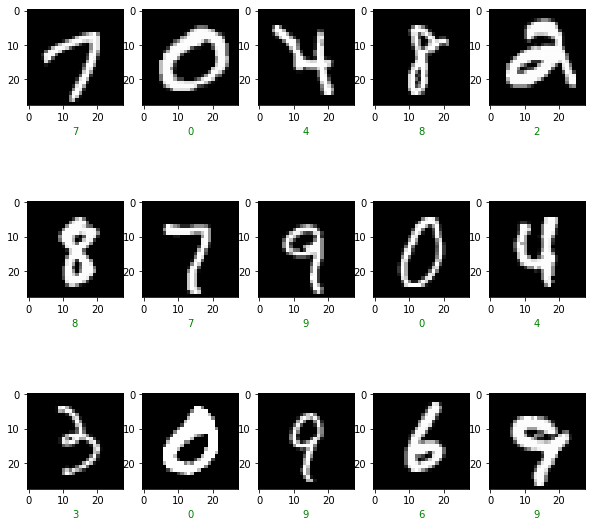

In [78]:
fig = plt.figure(figsize = (10, 10))

# 3 rows with 5 images on each
for i in range(1, (3 * 5) + 1):
  rn = np.random.randint(60000)
  fig.add_subplot(3, 5, i)          # subplot automatically adds the image row wise
  plt.imshow(x_train[rn], cmap = 'gray')
  plt.xlabel(np.argmax(y_train[rn]), color = 'g')      # argmax because of OHE
  
plt.show()

#### Some more adjustments and hyperparam selection

In [79]:
# normalizations
input_shape = (28, 28, 1)
x_train /= 255
x_test /= 255

batch_size = 64
num_classes = 10
epochs = 10

#### Building the model
###### Selecting the structure essentially

In [80]:
def build_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
              activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model


#### Progress Plotter

In [81]:
def progress_plotter(y1, y2, opt_name, noofepochs):
  plt.figure(figsize=(15, 5))
  plt.title(f"Model Accuracy over Epochs, Optimizer = {opt_name}")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy %")
  plt.plot([i for i in range(1, noofepochs + 1)], y1, color='b')
  plt.plot([i for i in range(1, noofepochs + 1)], y2, color='r')
  plt.xticks([i for i in range(1, noofepochs + 1)])
  plt.legend(['Training Acc.', 'Validation Acc.'], loc='best')
  plt.show()

#### Fitting the Model w/ different optimizers

#### 1. Adam

In [82]:
adam_model = build_model('Adam')
adam_hist = adam_model.fit(x_train, y_train, batch_size=batch_size,
                 epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 800)              

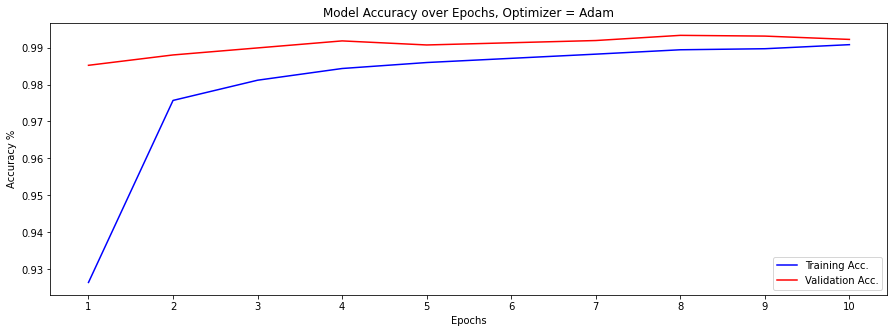

In [83]:
y1 = adam_hist.history['accuracy']
y2 = adam_hist.history['val_accuracy']
progress_plotter(y1, y2, "Adam", epochs)


#### 2. AdaGrad

In [84]:
adg_model = build_model("Adagrad")
adg_hist = adg_model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 800)              

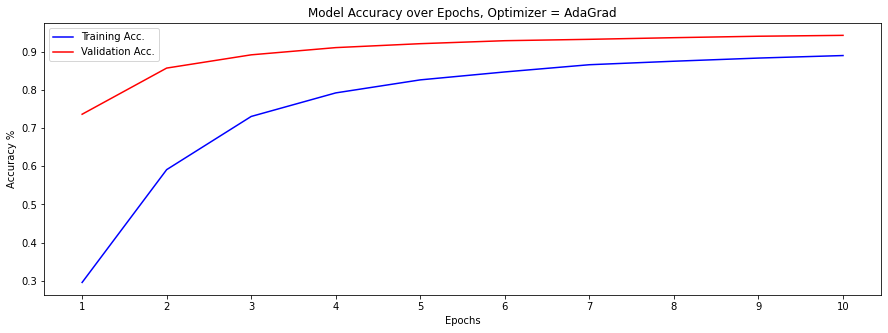

In [85]:
y1 = adg_hist.history['accuracy']
y2 = adg_hist.history['val_accuracy']
progress_plotter(y1, y2, "AdaGrad", epochs)

#### Making predictions

#### 1. Adam

In [86]:
adam_y_pred = adam_model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


#### 2. AdaGrad

In [87]:
adg_y_pred = adg_model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


#### Analysing the classifications

#### Confusion matrix plotter

In [94]:
def plot_confusion_matrix(labels, predictions):
  conf_mx = tf.math.confusion_matrix(labels = labels, predictions = predictions)
  plt.figure(figsize=(15, 8))
  sns.heatmap(conf_mx, annot=True, fmt = 'd')
  plt.xlabel("Predicted Value")
  plt.ylabel("Actual Value")
  plt.show()

In [88]:
y_test_num = [np.argmax(i) for i in y_test]

#### 1. Adam

In [89]:
adam_y_pred_num = [np.argmax(i) for i in adam_y_pred]

In [90]:
adam_noofincorr = 0
adam_incorr_indx = []
for i in range(len(y_test_num)):
  if y_test_num[i] != adam_y_pred_num[i]:
    adam_noofincorr += 1
    adam_incorr_indx.append(i)
print(f"No. of Incorrect with Adam Optimizer: {adam_noofincorr} / {len(y_test_num)}")

No. of Incorrect with Adam Optimizer: 78 / 10000


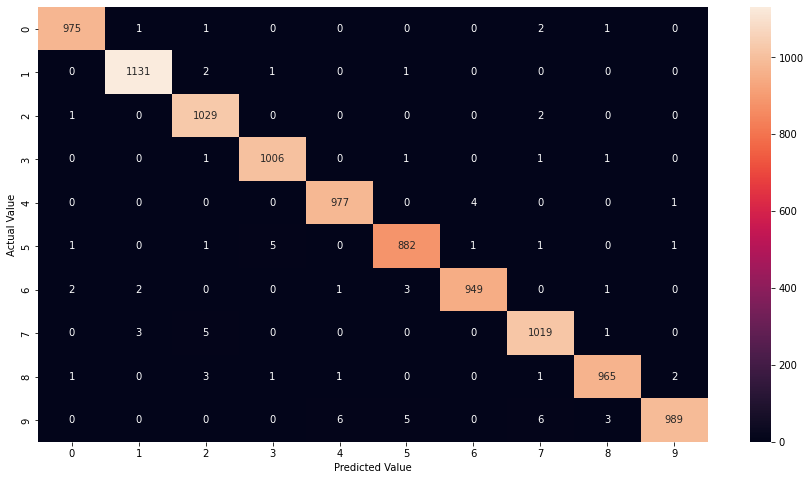

In [95]:
plot_confusion_matrix(y_test_num, adam_y_pred_num)

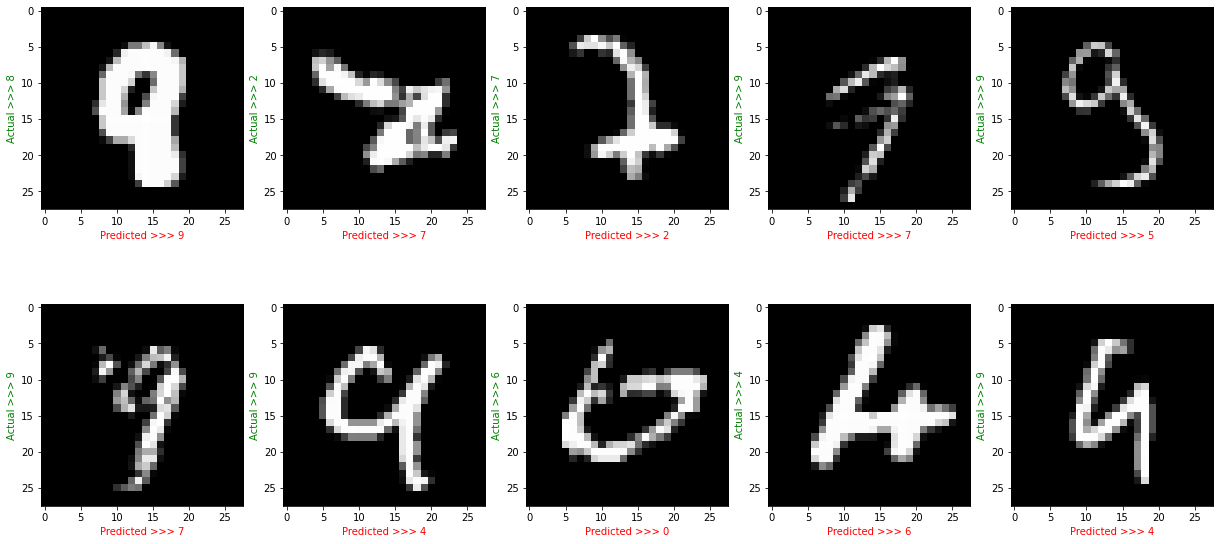

In [98]:
fig = plt.figure(figsize = (21, 10))

for i in range(1, (2 * 5) + 1):
  j = np.random.randint(len(adam_incorr_indx))
  rn = adam_incorr_indx[j]
  fig.add_subplot(2, 5, i)
  plt.imshow(x_test[rn], cmap = 'gray')
  plt.xlabel(f'Predicted >>> {adam_y_pred_num[rn]}', color = 'r')
  plt.ylabel(f'Actual >>> {y_test_num[rn]}', color = 'g')
plt.show()

#### 2. AdaGrad

In [91]:
adg_y_pred_num = [np.argmax(i) for i in adg_y_pred]

In [92]:
adg_noofincorr = 0
adg_incorr_indx = []
for i in range(len(y_test_num)):
  if y_test_num[i] != adg_y_pred_num[i]:
    adg_noofincorr += 1
    adg_incorr_indx.append(i)
print(f"No. of Incorrect with AdaGrad Optimizer: {adg_noofincorr} / {len(y_test_num)}")

No. of Incorrect with AdaGrad Optimizer: 572 / 10000


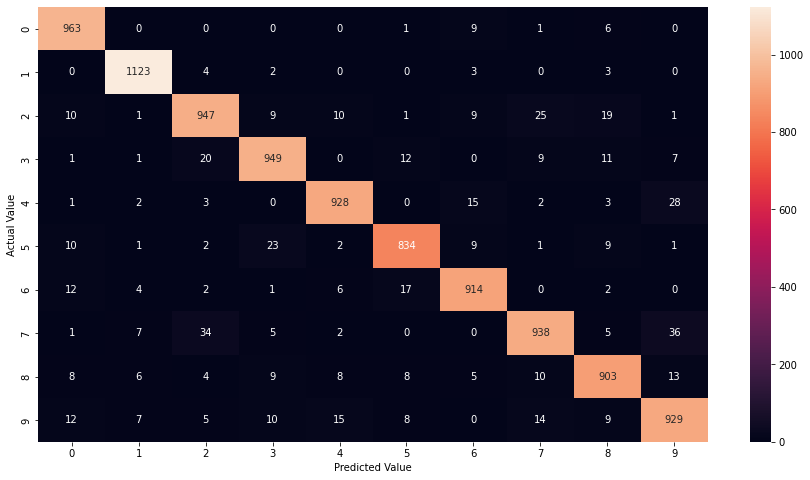

In [96]:
plot_confusion_matrix(y_test_num, adg_y_pred_num)

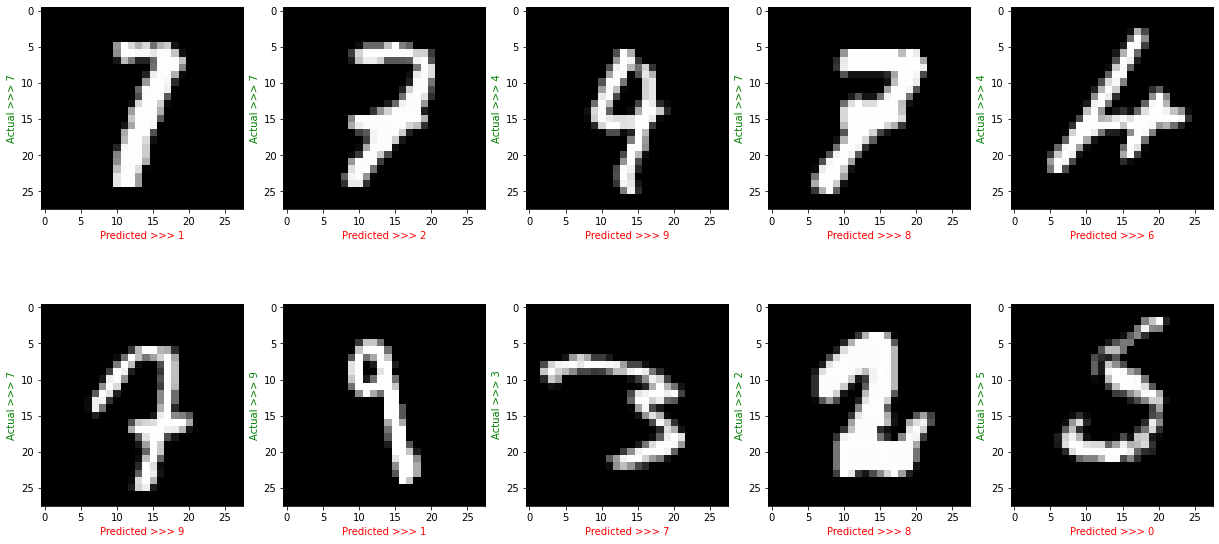

In [99]:
fig = plt.figure(figsize = (21, 10))

for i in range(1, (2 * 5) + 1):
  j = np.random.randint(len(adg_incorr_indx))
  rn = adg_incorr_indx[j]
  fig.add_subplot(2, 5, i)
  plt.imshow(x_test[rn], cmap = 'gray')
  plt.xlabel(f'Predicted >>> {adg_y_pred_num[rn]}', color = 'r')
  plt.ylabel(f'Actual >>> {y_test_num[rn]}', color = 'g')
plt.show()